In [1]:
# initial and general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from colorama import Fore, Back, Style
from sklearn import tree
from matplotlib.ticker import MaxNLocator
import itertools
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import collections 
import scipy
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# machine learning libraries
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import plot_tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# accuracy and metrics libraries
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# improve hyperparameters libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# fill null data libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Balancing dataset
from sklearn.utils import resample

# Feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

# imbalaced dataset 
import smote_variants as sv
import imbalanced_databases as imbd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier


sns.set()
%matplotlib inline

2022-07-07 12:38:53,213:DEBUG:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# Import primri data by ORgData name here
OrgData = pd.read_csv('mayo.csv')
OrgData

,id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,1,400,2,1.0,58.765229,f,1.0,1.0,1.0,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,1.0,56.446270,f,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,1.0,70.072553,m,0.0,0.0,0.0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,1.0,54.740589,f,0.0,1.0,1.0,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,2.0,38.105407,f,0.0,1.0,1.0,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,2,NaN,67.000684,f,NaN,NaN,NaN,0.0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,0,NaN,39.000684,f,NaN,NaN,NaN,0.0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,0,NaN,56.999316,f,NaN,NaN,NaN,0.0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,0,NaN,58.001369,f,NaN,NaN,NaN,0.0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [3]:
# drop week and non important features 
OrgData = OrgData.drop(['id', 'time'], axis = 1)

In [4]:
OrgData

,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
0,2,1.0,58.765229,f,1.0,1.0,1.0,1.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,0,1.0,56.446270,f,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,2,1.0,70.072553,m,0.0,0.0,0.0,0.5,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,2,1.0,54.740589,f,0.0,1.0,1.0,0.5,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1,2.0,38.105407,f,0.0,1.0,1.0,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2,NaN,67.000684,f,NaN,NaN,NaN,0.0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,0,NaN,39.000684,f,NaN,NaN,NaN,0.0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,0,NaN,56.999316,f,NaN,NaN,NaN,0.0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,0,NaN,58.001369,f,NaN,NaN,NaN,0.0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
# row and column count
rowCount = OrgData.shape[0]
colCount = OrgData.shape[1]
print(Back.WHITE+f'dataset have '+Back.RED+(str(rowCount))+Back.WHITE+' instances(rows)')
print(Back.WHITE+f'dataset have '+Back.RED+(str(colCount))+'  '+
      Back.WHITE+' features(columns)')

dataset have 418 instances(rows)
dataset have 18   features(columns)


In [6]:
# describe the dataset in here
OrgData.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
status,418.0,NaN,NaN,NaN,0.830144,0.955785,0.000000,0.000000,0.000000,2.000000,2.000000
trt,312.0,NaN,NaN,NaN,1.493590,0.500762,1.000000,1.000000,1.000000,2.000000,2.000000
age,418.0,NaN,NaN,NaN,50.741551,10.447214,26.277892,42.832307,51.000684,58.240931,78.439425
sex,418,2,f,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ascites,312.0,NaN,NaN,NaN,0.076923,0.266897,0.000000,0.000000,0.000000,0.000000,1.000000
hepato,312.0,NaN,NaN,NaN,0.512821,0.500639,0.000000,0.000000,1.000000,1.000000,1.000000
spiders,312.0,NaN,NaN,NaN,0.288462,0.453775,0.000000,0.000000,0.000000,1.000000,1.000000
edema,418.0,NaN,NaN,NaN,0.100478,0.253417,0.000000,0.000000,0.000000,0.000000,1.000000
bili,418.0,NaN,NaN,NaN,3.220813,4.407506,0.300000,0.800000,1.400000,3.400000,28.000000
chol,284.0,NaN,NaN,NaN,369.510563,231.944545,120.000000,249.500000,309.500000,400.000000,1775.000000


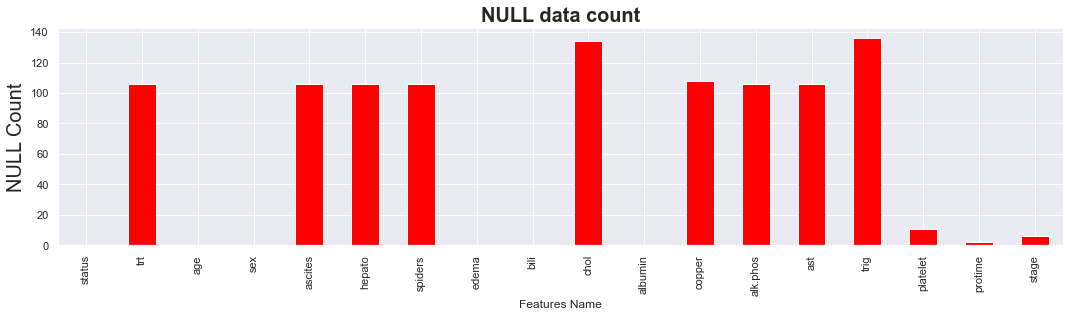

In [8]:
## null counts in here
plt.figure(figsize = (18, 4))
orgdataBar = OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
plt.show()

In [9]:
# data types 
OrgData.dtypes

status        int64
trt         float64
age         float64
sex          object
ascites     float64
hepato      float64
spiders     float64
edema       float64
bili        float64
chol        float64
albumin     float64
copper      float64
alk.phos    float64
ast         float64
trig        float64
platelet    float64
protime     float64
stage       float64
dtype: object

In [10]:
# Region and sex unique categorical data value for change into num
print(Back.RED+'sex unique values :\n')
print(OrgData.sex.value_counts(),'\n')

sex unique values :

f    374
m     44
Name: sex, dtype: int64 



In [11]:
# use pandas map for change categorical data into num
OrgData['sex']  = OrgData['sex'].map({'f':0, 'm': 1})
OrgData.dtypes

status        int64
trt         float64
age         float64
sex           int64
ascites     float64
hepato      float64
spiders     float64
edema       float64
bili        float64
chol        float64
albumin     float64
copper      float64
alk.phos    float64
ast         float64
trig        float64
platelet    float64
protime     float64
stage       float64
dtype: object

In [12]:
# change y --> 1, 2, 3 :0 becuse thats not cirrhosis and 4:1 
# We ave 0, 1; 0:not, 1: disorders

OrgData.stage[OrgData.stage < 4] = 0
OrgData.stage[OrgData.stage == 4] = 1

<ipython-input-12-79ec6e993e17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OrgData.stage[OrgData.stage < 4] = 0
<ipython-input-12-79ec6e993e17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  OrgData.stage[OrgData.stage == 4] = 1


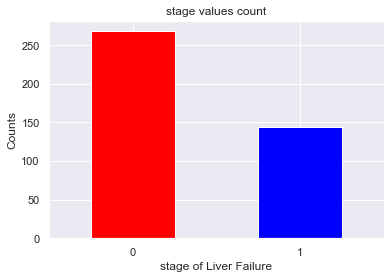

In [13]:
# balance sit for dataset
OrgData.stage.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('stage of Liver Failure')
plt.ylabel('Counts')
plt.title('stage values count')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [14]:
# drop null of target, we should droped target nulls 
OrgData = OrgData.dropna(subset=['stage'])

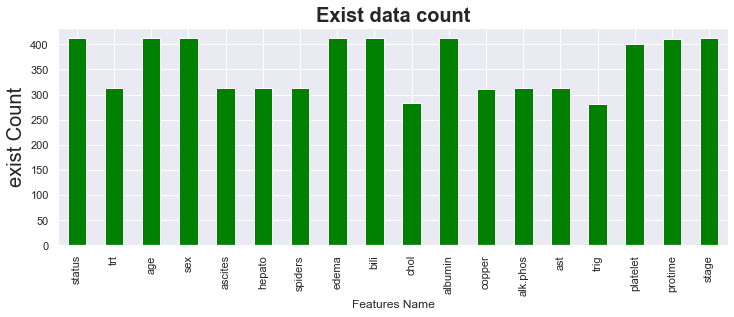

In [15]:
# features count
plt.figure(figsize = (12, 4))
OrgData.describe(include = 'all').T['count'].plot(kind = 'bar', color = 'Green')
plt.xlabel('Features Name')
plt.ylabel('exist Count', fontsize = 20)
plt.title('Exist data count', fontsize = 20,fontweight = 'bold')
plt.show()

Dataset size is :  412


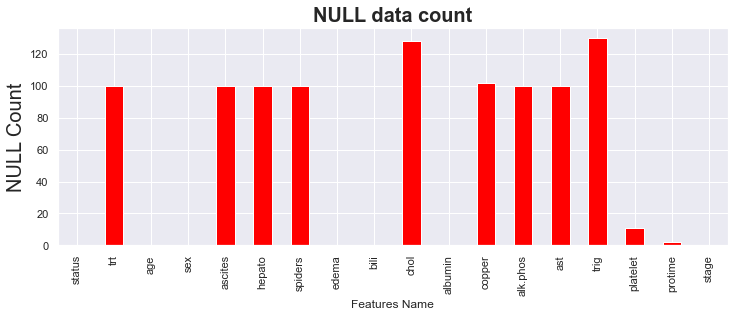

In [16]:
# null data bar
plt.figure(figsize = (12, 4))
OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
print('Dataset size is : ', Back.RED + str(len(OrgData)))
plt.show()

In [17]:
print(Back.WHITE + 'By null data we have ', str(len(OrgData)))
print('After drop all null data we have ', str(len(OrgData.dropna())))
print('by null data we have ', len(OrgData[OrgData.stage == 1]), ' pos instances')
print('Without null data we have ', len(OrgData.dropna()[OrgData.stage == 1]), ' pos instances')
print('dropna null data causes ',
      len(OrgData[OrgData.stage == 1]) - len(OrgData.dropna()[OrgData.stage == 1])
      ,' the lose pos instances')

By null data we have  412
After drop all null data we have  276
by null data we have  144  pos instances
Without null data we have  94  pos instances
dropna null data causes  50  the lose pos instances


<ipython-input-17-325f9e7b2e18>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print('Without null data we have ', len(OrgData.dropna()[OrgData.stage == 1]), ' pos instances')
<ipython-input-17-325f9e7b2e18>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(OrgData[OrgData.stage == 1]) - len(OrgData.dropna()[OrgData.stage == 1])


Dataset size is :  276


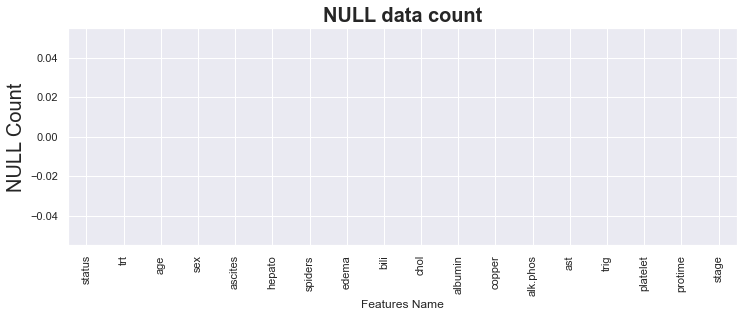

In [18]:

OrgData = OrgData.dropna()
# null data bar
plt.figure(figsize = (12, 4))
OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
print('Dataset size is : ', Back.RED + str(len(OrgData)))
plt.show()

dataset have  276  Instances
dataset have  182  Negative Instances
dataset have  94   Positive Instances


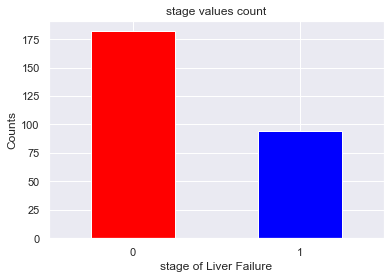

In [19]:
# dataset without null data 
print( Back.WHITE +'dataset have ', Back.RED + str(len(OrgData)), Back.WHITE + ' Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(OrgData.stage.value_counts()[0]),
      Back.WHITE + ' Negative Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(OrgData.stage.value_counts()[1]),
      Back.WHITE + '  Positive Instances')
OrgData.stage.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('stage of Liver Failure')
plt.ylabel('Counts')
plt.title('stage values count')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()
priData = OrgData

### first balanced dataset with our method and hen use balanced data for semi-supervised work

In [20]:
# pos and neg instances count
priData.stage.value_counts()

0.0    182
1.0     94
Name: stage, dtype: int64

In [21]:
# Seperate test and train data
# use stratified method for split input and output into train and test parts: 
np.random.seed(42)
trainData, testData = train_test_split(priData, 
                                       test_size = .2)

In [22]:
# percentage of trainig and test 
print(Back.WHITE + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(trainData)/len(priData))*100))), ' %')
print(Back.GREEN + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(testData)/len(priData))*100))), ' %')

Percentage of trainig data is :  79  %
Percentage of trainig data is :  20  %


In [23]:
# count of pos and neg of trainig and test parts
print(Back.WHITE + 'training data Neg instances count is : ', trainData.stage.value_counts()[0], 
     ' & pos counts : ',trainData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',trainData.stage.value_counts()[1]/trainData.stage.value_counts()[0] )
print(Back.RED + 'test data Neg instances count is : ', testData.stage.value_counts()[0], 
     ' & pos counts : ', testData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',testData.stage.value_counts()[1]/testData.stage.value_counts()[0] )


training data Neg instances count is :  146  & pos counts :  74
Pos/Neg in trainig data is :  0.5068493150684932
test data Neg instances count is :  36  & pos counts :  20
Pos/Neg in trainig data is :  0.5555555555555556


In [24]:
# fpercent values : count of feature for new value 
majoritySize = len(trainData[trainData.stage == 0])
minoritySize = len(trainData[trainData.stage == 1])
featureCount = len(trainData.columns)
fPercent = round(featureCount / 10)+1
#fPercent = round(featureCount / 1) # change all feature of instances 
# problem of change all of feture is repeat data 

In [25]:
# create majority and minority dataset
majorityData = trainData[trainData.stage == 0]
majorityData = majorityData.reset_index()
minorityData = trainData[trainData.stage == 1]
minorityData = minorityData.reset_index()
minorityData = minorityData.drop('index', axis = 1)
majorityData = majorityData.drop('index', axis = 1)

In [26]:
# feature names for change column name frm int to real names
featureNames = minorityData.columns 

In [27]:
# feature int name for work by integer values
minorityData.columns = range(1,featureCount+1)
majorityData.columns = range(1,featureCount+1)

In [28]:
# create two empty matrix
minorFeatureValues = []
majorFeatureValues = []
# temporatory matrix for temp instance
minorEXchange = np.array(np.zeros(featureCount))
# loop by feaure count for mean values 
for i in range(featureCount):
    minorFeatureValues.append(round((minorityData[i+1]).mean()))
for i in range(featureCount):
    majorFeatureValues.append(round((majorityData[i+1]).mean()))
# an array by men value of majority and minority of dataset    
minorFeatureValues = np.array(minorFeatureValues)
majorFeatureValues = np.array(majorFeatureValues)

In [29]:
# an array by distance between features of majority and minority 
distanceValue = abs(np.array(majorFeatureValues) - np.array(minorFeatureValues))
distanceValue = np.array(distanceValue)

In [30]:
# if distance is 0 ( mean of minority and majority is eual) not changed
# value os minority change by half of distances ( countinuous value)
# value of categorical features is not change  
for i in range(len(distanceValue)):
    if minorFeatureValues[i] < 2 : # categorical features
        minorEXchange[i] = minorFeatureValues[i]
    elif minorFeatureValues[i] > majorFeatureValues[i]:
        minorEXchange[i] = minorFeatureValues[i] + (distanceValue[i]/2)# minority is bigger
    else:
        minorEXchange[i] = minorFeatureValues[i] - (distanceValue[i]/2) # majority is bigger 

In [31]:
# new instances count
newInsCount = majoritySize - minoritySize

In [32]:
# creator loop
for i in range(newInsCount):
    temAarray = np.zeros(featureCount) # an array by zeros and count of feature size
    featureEch = np.random.randint(1, featureCount, fPercent)# number of features for new values
    randIns = int(np.random.randint(1, i + minoritySize, 1))#select an inatance as parent
    temAarray = minorityData.loc[randIns]#temp array for parent
    temAarray = list(temAarray)#temp arra as list
    temAarray = np.array(temAarray)#temp array as array
    temAarray[[featureEch]] = minorEXchange[[featureEch]]#change randomic (fpercent count) feature by minorExchange array values(same features)
    minorityData.loc[minoritySize+i] = temAarray # new instances in minorityData dataset
    minorityData.loc[minoritySize+i][18] = 1 # sure for value of target label

<ipython-input-32-1a5dbb5be506>:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  temAarray[[featureEch]] = minorEXchange[[featureEch]]#change randomic (fpercent count) feature by minorExchange array values(same features)


In [33]:
# create value for plus by datasets for mor far
minorityMean = np.zeros(featureCount)
majorityMean = np.zeros(featureCount)
distanceMean = np.zeros(featureCount)
minorityPlus = np.zeros(featureCount)
majorityPlus = np.zeros(featureCount)
for i in range(featureCount):
    minorityMean[i] = round(minorityData[i+1].mean())
    majorityMean[i] = round(majorityData[i+1].mean())
    minorityPlus[i] = minorityMean[i] - majorityMean[i]
    majorityPlus[i] = majorityMean[i] - minorityMean[i]
distanceMean  = abs(minorityMean - majorityMean)

In [34]:
# categorical features
for i in range(featureCount):
    if -1<=minorityPlus[i]<=1:
        minorityPlus[i] = 0

In [35]:
# categorical features
for i in range(featureCount):
    if -1<=majorityPlus[i]<=1:
        majorityPlus[i] = 0

In [36]:
# far away for minority data : first compare two dataset mean values 
# next change off all features 
for i in range(len(minorityData)):
    minorityData.loc[i] = minorityData.loc[i] + minorityPlus


In [37]:
# far away for majority data : first compare two dataset mean values 
# next change off all features 
for i in range(len(majorityData)):
    majorityData.loc[i] = majorityData.loc[i] + majorityPlus
    majorityData.loc[i][20] = 0  
 

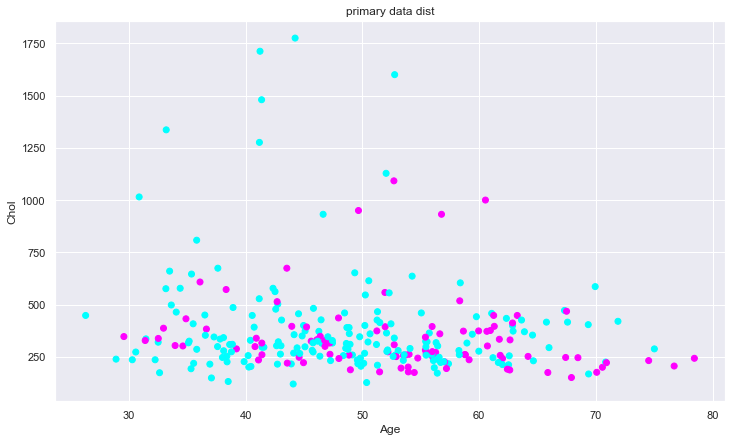

In [38]:
# primary dataset dist
plt.figure(figsize = (12, 7))
plt.scatter(priData['age'], priData['chol'], c = priData['stage'], cmap = 'cool')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('primary data dist')
plt.show()

In [39]:
# create balanced data
balancedData = majorityData
balancedData = balancedData.append(minorityData)
balancedData = balancedData.reset_index()
balancedData = balancedData.drop('index', axis = 1)

In [40]:
# minority dataset and majority dataset shuffle togther
balancedData

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,2.0,48.410678,0.0,0.0,0.0,0.0,0.0,-1.7,227.0,3.39,-36.0,678.0,61.30,87.0,364.0,10.6,0.0
1,2.0,2.0,29.607118,0.0,0.0,1.0,0.0,0.0,9.0,729.0,3.55,304.0,2532.0,157.40,131.0,524.0,9.8,0.0
2,0.0,1.0,40.662560,0.0,0.0,0.0,0.0,0.0,-0.8,445.0,3.61,-22.0,1629.0,78.35,43.0,316.0,9.0,0.0
3,0.0,2.0,54.521561,0.0,0.0,0.0,0.0,0.0,-1.4,267.0,4.03,-44.0,768.0,61.30,68.0,369.0,17.1,0.0
4,0.0,1.0,40.870637,0.0,0.0,0.0,0.0,0.0,-0.9,416.0,3.64,-18.0,5550.2,57.08,80.0,256.0,10.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,2.0,1.0,65.500000,0.0,0.0,1.0,0.0,0.0,8.3,381.0,2.50,129.0,2056.0,180.50,113.0,157.0,11.5,1.0
288,2.0,1.0,78.907598,0.0,1.0,1.0,1.0,0.0,8.0,284.0,2.33,192.0,500.0,116.00,100.0,142.0,12.1,1.0
289,0.0,1.0,64.013689,0.0,0.0,1.0,0.0,0.5,3.3,195.0,3.50,102.0,1018.0,149.50,109.0,28.0,12.9,1.0
290,1.0,2.0,42.874743,0.0,0.0,1.0,0.0,0.5,3.1,377.0,3.57,99.0,1286.0,200.00,86.0,195.0,11.4,1.0


In [41]:
# use features name for new balanced dataset
balancedData = balancedData.sample(frac = 1)
balancedData = balancedData.reset_index()
balancedData = balancedData.drop(['index'], axis = 1)
balancedData.columns = featureNames
trainData.columns = featureNames

In [42]:
# new dataset as balanced
balancedData.stage.value_counts()

0.0    146
1.0    146
Name: stage, dtype: int64

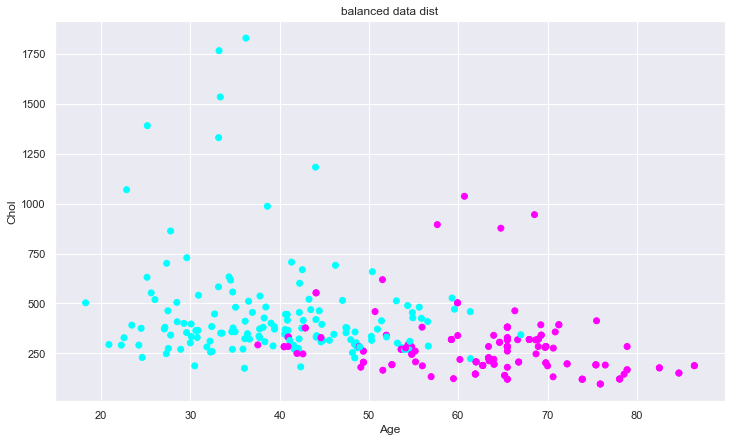

In [43]:
# balanced dataset dist
plt.figure(figsize = (12, 7))
plt.scatter(balancedData['age'], balancedData['chol'], c = balancedData['stage'], cmap = 'cool')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('balanced data dist')
plt.show()

### we have a balanced  dataset 

dataset have  292  Instances
dataset have  146  Negative Instances
dataset have  146   Positive Instances


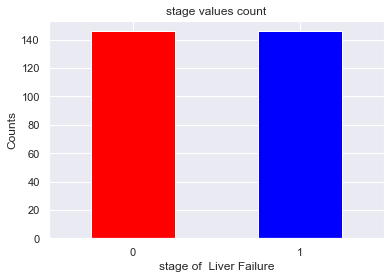

In [44]:
#new dataset balancing
print( Back.WHITE +'dataset have ', Back.RED + str(len(balancedData)), Back.WHITE + ' Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(balancedData.stage.value_counts()[0]),
      Back.WHITE + ' Negative Instances')
print( Back.WHITE +'dataset have ', Back.RED + str(balancedData.stage.value_counts()[1]),
      Back.WHITE + '  Positive Instances')
balancedData.stage.dropna().astype(int).value_counts().plot.bar(color = ['red', 'blue'] )
plt.xlabel('stage of  Liver Failure')
plt.ylabel('Counts')
plt.title('stage values count')
plt.xticks(rotation=0, horizontalalignment="center")
plt.show()

In [45]:
# Seperate test and train data
# use stratified method for split input and output into train and test parts: 
np.random.seed(42)
trainData, testData = train_test_split(balancedData, 
                                       test_size = .2)

In [46]:
print(Back.WHITE + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(trainData)/len(balancedData))*100))), ' %')
print(Back.GREEN + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(testData)/len(balancedData))*100))), ' %')

Percentage of trainig data is :  79  %
Percentage of trainig data is :  20  %


In [47]:
print(Back.WHITE + 'training data Neg instances count is : ', trainData.stage.value_counts()[0], 
     ' & pos counts : ',trainData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',trainData.stage.value_counts()[1]/trainData.stage.value_counts()[0] )
print(Back.RED + 'test data Neg instances count is : ', testData.stage.value_counts()[0], 
     ' & pos counts : ', testData.stage.value_counts()[1] )
print('Pos/Neg in trainig data is : ',testData.stage.value_counts()[1]/testData.stage.value_counts()[0] )


training data Neg instances count is :  110  & pos counts :  123
Pos/Neg in trainig data is :  1.1181818181818182
test data Neg instances count is :  36  & pos counts :  23
Pos/Neg in trainig data is :  0.6388888888888888


### divide dataset into separaed train and test part

In [48]:
np.random.seed(42)
# define training and test data
x_train = trainData.drop('stage', axis = 1)
y_train = trainData.stage

x_test = testData.drop('stage', axis = 1)
y_test = testData.stage

#### use train part for train label and use test part for new labels

#### train part :

In [49]:
x_train = x_train.reset_index()
x_train = x_train.drop('index', axis = 1)
y_train = y_train.reset_index()
y_train = y_train.drop('index', axis = 1)

In [50]:
x_train

,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime
0,0.0,2.0,39.263518,0.0,0.0,0.0,0.0,0.0,-0.8,287.0,3.98,-43.0,1194.0,90.75,90.0,276.0,9.9
1,0.0,1.0,53.070500,0.0,0.0,0.0,1.0,0.5,1.0,513.0,3.63,20.0,1708.0,96.95,373.0,491.0,9.9
2,0.0,2.0,34.639288,0.0,0.0,0.0,1.0,0.0,-1.3,358.0,4.19,27.0,1704.0,101.60,147.0,360.0,10.3
3,2.0,1.0,63.392197,0.0,0.0,1.0,0.0,0.0,8.0,227.0,3.00,106.0,8946.8,82.24,120.0,510.0,10.6
4,0.0,1.0,86.439425,1.0,1.0,1.0,1.0,0.0,8.0,188.0,3.03,434.0,863.0,149.50,163.0,44.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,1.0,32.717317,0.0,0.0,0.0,0.0,0.0,0.1,447.0,3.43,-2.0,1515.0,174.45,185.0,381.0,10.2
229,0.0,1.0,41.560575,0.0,0.0,1.0,0.0,0.5,-1.3,290.0,3.56,-15.0,2001.0,83.00,114.0,262.0,11.0
230,2.0,1.0,69.804244,1.0,0.0,1.0,1.0,0.5,5.0,202.0,3.79,344.0,1544.0,112.30,121.0,87.0,9.9
231,2.0,1.0,78.072553,1.0,0.0,0.0,0.0,0.5,3.4,121.0,3.48,264.0,396.0,106.10,64.0,98.0,12.0


In [51]:
y_train

,stage
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
228,0.0
229,0.0
230,1.0
231,1.0


In [52]:
x_test = x_test.reset_index()
x_test = x_test.drop('index', axis = 1)
y_test = y_test.reset_index()
y_test = y_test.drop('index', axis = 1)

In [53]:
x_test

,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime
0,0.0,1.0,24.613279,0.0,0.0,0.0,0.0,0.0,-1.3,229.0,4.09,4.0,762.0,61.30,37.0,256.0,10.6
1,0.0,1.0,30.770705,0.0,0.0,0.0,0.0,0.0,-1.3,329.0,3.66,54.0,1185.0,78.35,126.0,304.0,10.1
2,2.0,2.0,44.079398,0.0,0.0,1.0,0.0,0.0,13.4,553.0,3.31,119.0,1670.0,161.90,219.0,245.0,10.8
3,0.0,1.0,50.264203,0.0,0.0,0.0,0.0,0.0,-1.5,335.0,4.23,-18.0,497.0,46.00,137.0,280.0,10.6
4,1.0,2.0,26.039699,0.0,0.0,1.0,0.0,0.0,-0.9,519.0,4.20,-16.0,1764.0,141.90,93.0,401.0,10.3
5,2.0,2.0,38.264203,0.0,0.0,1.0,0.0,0.0,2.5,427.0,3.38,173.0,2430.0,157.40,126.0,293.0,12.4
6,1.0,1.0,40.950034,0.0,0.0,1.0,0.0,0.0,4.1,332.0,3.77,117.0,1493.0,160.35,42.0,132.0,10.1
7,0.0,1.0,32.202601,0.0,0.0,0.0,0.0,0.0,-0.8,311.0,3.60,20.0,844.0,131.05,99.0,483.0,10.0
8,0.0,1.0,66.647502,0.0,0.0,0.0,1.0,0.0,8.4,318.0,3.46,209.0,1648.0,130.00,160.0,205.0,10.1
9,0.0,2.0,27.088296,0.0,0.0,0.0,0.0,0.5,-1.0,372.0,3.56,-10.0,1756.0,74.00,102.0,447.0,9.8


In [54]:
y_test

,stage
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,1.0
9,0.0


In [55]:
# define new variable for Pos & Neg Average
posMean = minorityMean
negMean = majorityMean

# define new variable for calculate distance between avareage of pos and neg from mean of train dataset
posDistance = np.zeros(featureCount-1)
negDistance = np.zeros(featureCount-1)

# define temporary array for vote between Pos and Neg classes
voteArrayOne = np.zeros(featureCount-1)
voteArrayZero = np.zeros(featureCount-1)


# define predictions variables array
predictionLabel = np.zeros(len(x_test))

featureCountTest = featureCount - 1

In [56]:
# calculate pearson and searman between features and target
featureNames = trainData.columns 
pearsonrCor = np.zeros(featureCount-1)
spearmanrCor = np.zeros(featureCount-1)
trainData.columns = range(1,featureCount+1)

In [57]:
# calculate both of relationship between target and other features 
for i in range(featureCountTest):
    pearsonrCor[i] = pearsonr(trainData[i+1], trainData[featureCount])[0]
    #spearmanrCor[i] = spearmanr(trainData[i+1], trainData[featureCount])[0]

In [58]:
# get a mean of two corelation
AverageCor = np.zeros(featureCountTest)
#AverageCor = (pearsonrCor + spearmanrCor)/2

# just use pearson 
AverageCor = pearsonrCor 

### use test part of Original dataset for new labels

In [59]:
for i in range(len(x_test)):
    for j in range(featureCountTest):
        posDistance[j] = abs(x_test.iloc[i][j] - posMean[j])
        negDistance[j] = abs(x_test.iloc[i][j] - negMean[j])
        if posDistance[j] == negDistance[j]:
            voteArrayOne[j] = 0
            voteArrayZero[j] = 0
        elif  posDistance[j] < negDistance[j]:
            voteArrayOne[j] = AverageCor[j]
            voteArrayZero[j] = 0
        else:
            voteArrayZero[j] = AverageCor[j]
            voteArrayOne[j] = 0
    sum0 = sum(voteArrayZero)
    sum1 = sum(voteArrayOne)
    if sum0 > sum1 :
        predictionLabel[i] = 0
    else:
        predictionLabel[i] = 1 
predictionLabel         

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0.])

In [60]:
predictionLabel

array([0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0.])

In [61]:
np.count_nonzero(predictionLabel == 0)

32

In [62]:
np.count_nonzero(predictionLabel == 1)

27

In [63]:
y_test = np.array(y_test).T

In [64]:
resultsArray = (y_test - predictionLabel)

In [65]:
# count of Trues
Tcount = np.count_nonzero(resultsArray == 0)

In [66]:
# percenrtage of True
print(Back.RED + 'accuracy of True label is : ',Back.GREEN + str(round(((Tcount/len(x_test))*100),2)),'%')

accuracy of True label is :  79.66 %


In [67]:
y_test = np.array(y_test).T

In [68]:
# use feature names for cont
trainData.columns = featureNames

# self_training_model Method on MAYO dataset

In [69]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
rng = np.random.RandomState(42)
random_unlabeled_points = rng.rand(trainData.stage.shape[0]) < 0.3
trainData.stage[random_unlabeled_points] = -1
svc = SVC(probability=True, gamma="auto")
self_training_model = SelfTrainingClassifier(svc)
self_training_model.fit(x_train, y_train)

c:\users\top\appdata\local\programs\python\python39\lib\site-packages\pandas\core\series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_self_training.py:187: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=SVC(gamma='auto', probability=True))

In [70]:
self_training_modelPredict = self_training_model.predict(x_test)

In [71]:
self_training_modelPredictResults = y_test - self_training_modelPredict 

In [72]:
# count of Trues of self_training_model
Tcountself_training_model = np.count_nonzero(self_training_modelPredictResults == 0)

In [73]:
# percenrtage of self_training_model
print(Back.RED + 'accuracy of True of self_training_model on mayo dataset is : '
      ,Back.GREEN + str(round(((Tcountself_training_model/len(x_test))*100))),'%')

accuracy of True of self_training_model on mayo dataset is :  3490 %


# LogisticRegression  Method on MAYO dataset

In [74]:
# define model
model = LogisticRegression()
# fit model on labeled dataset
model.fit(trainData.drop('stage', axis = 1), trainData.stage)

c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
# make predictions on hold out test set
yhat = model.predict(x_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
scoreLogistic = round(score*100, 2)
# summarize score
print(Back.RED + 'accuracy of True of Logistic Regression on mayo dataset is : '
      ,Back.GREEN + str(((scoreLogistic))),'%')

accuracy of True of Logistic Regression on mayo dataset is :  79.66 %


# Label Spreading  Method on MAYO dataset

In [76]:
# define model
from sklearn.semi_supervised import LabelSpreading
model = LabelSpreading()
# fit model on training dataset
model.fit(trainData.drop('stage', axis = 1), trainData.stage)

LabelSpreading()

In [77]:
# make predictions on hold out test set
yhat = model.predict(x_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
scoreLabelSpreading = round(score*100, 2)
# summarize score
print(Back.RED + 'accuracy of True of Label Spreading on mayo dataset is : '
      ,Back.GREEN + str(((scoreLabelSpreading))),'%')

accuracy of True of Label Spreading on mayo dataset is :  67.8 %


c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


# LabelPropagation  Method on MAYO dataset

In [78]:
# define model
from sklearn.semi_supervised import LabelPropagation
model = LabelPropagation()
# fit model on training dataset
model.fit(trainData.drop('stage', axis = 1), trainData.stage)

c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:281: RuntimeWarning: invalid value encountered in true_divide
  self.label_distributions_ /= normalizer
c:\users\top\appdata\local\programs\python\python39\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:290: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


LabelPropagation()

In [79]:
# make predictions on hold out test set
yhat = model.predict(x_test)
# calculate score for test set
score = accuracy_score(y_test, yhat)
scoreLabelPropagation = round(score*100, 2)
# summarize score
print(Back.RED + 'accuracy of True of Label Propagation on MAYO dataset is : '
      ,Back.GREEN + str(((scoreLabelPropagation))),'%')

accuracy of True of Label Propagation on MAYO dataset is :  61.02 %


# Results: 

In [80]:
# percenrtage of True
print(Back.RED + 'accuracy of New method is  : ',Back.GREEN + str(round(((Tcount/len(x_test))*100),2)),'% \n')

print('**********************************************************************************\n')

# percenrtage of self_training_model
print(Back.RED + 'accuracy of True of self_training_model on mayo dataset is : '
      ,Back.GREEN + str(round(((Tcountself_training_model/len(x_test))*100),2)),'% \n')

print('**********************************************************************************\n')

print(Back.RED + 'accuracy of True of Logistic Regression on mayo dataset is : '
      ,Back.GREEN + str(((scoreLogistic))),'% \n')

print('**********************************************************************************\n')

print(Back.RED + 'accuracy of True of Label Spreading on mayo dataset is : '
      ,Back.GREEN + str(((scoreLabelSpreading))),'% \n')

print('**********************************************************************************\n')

print(Back.RED + 'accuracy of True of Label Propagation on mayo dataset is : '
      ,Back.GREEN + str(((scoreLabelPropagation))),'%')

accuracy of New method is  :  79.66 % 

**********************************************************************************

accuracy of True of self_training_model on mayo dataset is :  3489.83 % 

**********************************************************************************

accuracy of True of Logistic Regression on mayo dataset is :  79.66 % 

**********************************************************************************

accuracy of True of Label Spreading on mayo dataset is :  67.8 % 

**********************************************************************************

accuracy of True of Label Propagation on mayo dataset is :  61.02 %
